In [126]:
# Re-import necessary modules after code state reset
import pandas as pd
import numpy as np
# Reload file paths
botnet = r"C:\Users\USER\CyberMOPAI\torii_mal_fan.csv"
normal = r"C:\Users\USER\CyberMOPAI\torii_leg_fan.csv"

# Load small chunks to inspect structure
botnet_df = pd.read_csv(botnet, nrows=2500)
normal_df = pd.read_csv(normal, nrows=2500)

# Compare shapes and column names
bot_shape = botnet_df.shape
normal_shape = normal_df.shape
columns_match = botnet_df.columns.equals(normal_df.columns)
column_names = botnet_df.columns.tolist()

bot_shape, normal_shape, columns_match, column_names[:10]  # show a few columns only


((2500, 100),
 (2500, 100),
 True,
 ['MI_dir_5_weight',
  'MI_dir_5_mean',
  'MI_dir_5_std',
  'MI_dir_3_weight',
  'MI_dir_3_mean',
  'MI_dir_3_std',
  'MI_dir_1_weight',
  'MI_dir_1_mean',
  'MI_dir_1_std',
  'MI_dir_0.1_weight'])

In [128]:
# Step 1: Load full datasets and label them
mal_full = pd.read_csv(botnet)
legit_full = pd.read_csv(normal)

# Add labels: 1 for malicious, 0 for legitimate
mal_full['label'] = 1
legit_full['label'] = 0

# Combine both datasets
combined_df = pd.concat([mal_full, legit_full], ignore_index=True)

# Step 2a: Drop constant columns (no variance)
nunique = combined_df.nunique()
constant_cols = nunique[nunique <= 1].index.tolist()
cleaned_df = combined_df.drop(columns=constant_cols)

# Step 2b: Check for missing values
missing_info = cleaned_df.isnull().sum()
missing_cols = missing_info[missing_info > 0]

cleaned_df.shape, constant_cols, missing_cols


((214420, 101), [], Series([], dtype: int64))

In [129]:
cleaned_df

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,label
0,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,0.000000,74.000000,0.000000e+00,0.000000e+00,1
1,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,0.000000,104.651804,0.000000e+00,0.000000e+00,1
2,1.995108,69.990192,1.599990e+01,1.997062,69.994115,1.599997e+01,1.999020,69.998038,1.600000e+01,1.999902,...,0.000000e+00,0.000000e+00,1.999990,69.999980,1.600000e+01,4.000000,101.862639,0.000000e+00,0.000000e+00,1
3,2.994257,77.674838,1.284248e+02,2.996551,77.671570,1.283438e+02,2.998849,77.668301,1.282628e+02,2.999885,...,0.000000e+00,0.000000e+00,2.999988,77.666683,1.282226e+02,11.323543,107.275876,0.000000e+00,0.000000e+00,1
4,1.994994,69.989964,1.599990e+01,1.996994,69.993978,1.599996e+01,1.998997,69.997993,1.600000e+01,1.999900,...,-1.362939e+01,-3.009039e-01,1.999990,69.999980,1.600000e+01,12.009273,104.556735,-1.362961e+01,-3.009130e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214415,1.153054,68.000000,0.000000e+00,1.617289,68.000000,0.000000e+00,3.489662,68.000000,9.094947e-13,5.768387,...,2.755166e-15,8.321167e-09,19.448325,68.000000,4.547474e-12,0.978707,95.606209,2.863405e-15,1.371971e-09,0
214416,1.975331,66.987512,9.998440e-01,1.985125,66.992507,9.999439e-01,1.995017,66.997502,9.999938e-01,2.031048,...,4.866936e-15,3.608615e-09,5.871283,66.999981,1.000000e+00,1.000000,95.462021,4.361229e-15,2.045143e-09,0
214417,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.031562,...,5.026033e-15,1.517943e-08,4.871510,67.205262,9.578674e-01,0.978707,95.606209,4.643847e-15,2.225052e-09,0
214418,2.084801,68.000000,9.094947e-13,2.559150,68.000000,9.094947e-13,4.447334,68.000000,0.000000e+00,6.761352,...,4.004383e-15,0.000000e+00,20.445951,68.000000,2.728484e-12,0.978707,95.606209,3.681541e-15,2.277279e-09,0


In [130]:
print(cleaned_df.describe())

       MI_dir_5_weight  MI_dir_5_mean  MI_dir_5_std  MI_dir_3_weight  \
count    214420.000000  214420.000000  2.144200e+05    214420.000000   
mean          1.842067      71.041358  7.888958e+02         1.928776   
std           5.368519      96.423530  1.504315e+04         5.654362   
min           1.000000      60.000000  0.000000e+00         1.000000   
25%           1.000000      60.000000  0.000000e+00         1.000021   
50%           1.000000      60.000000  4.547474e-13         1.000124   
75%           1.972106      68.000000  1.818989e-12         1.987411   
max         114.206123    1501.008801  5.212975e+05       119.501686   

       MI_dir_3_mean  MI_dir_3_std  MI_dir_1_weight  MI_dir_1_mean  \
count  214420.000000  2.144200e+05    214420.000000  214420.000000   
mean       71.002420  8.332661e+02         2.176267      70.787764   
std        96.036964  1.558280e+04         6.005570      95.606441   
min        60.000000  0.000000e+00         1.000000      60.000000   
2

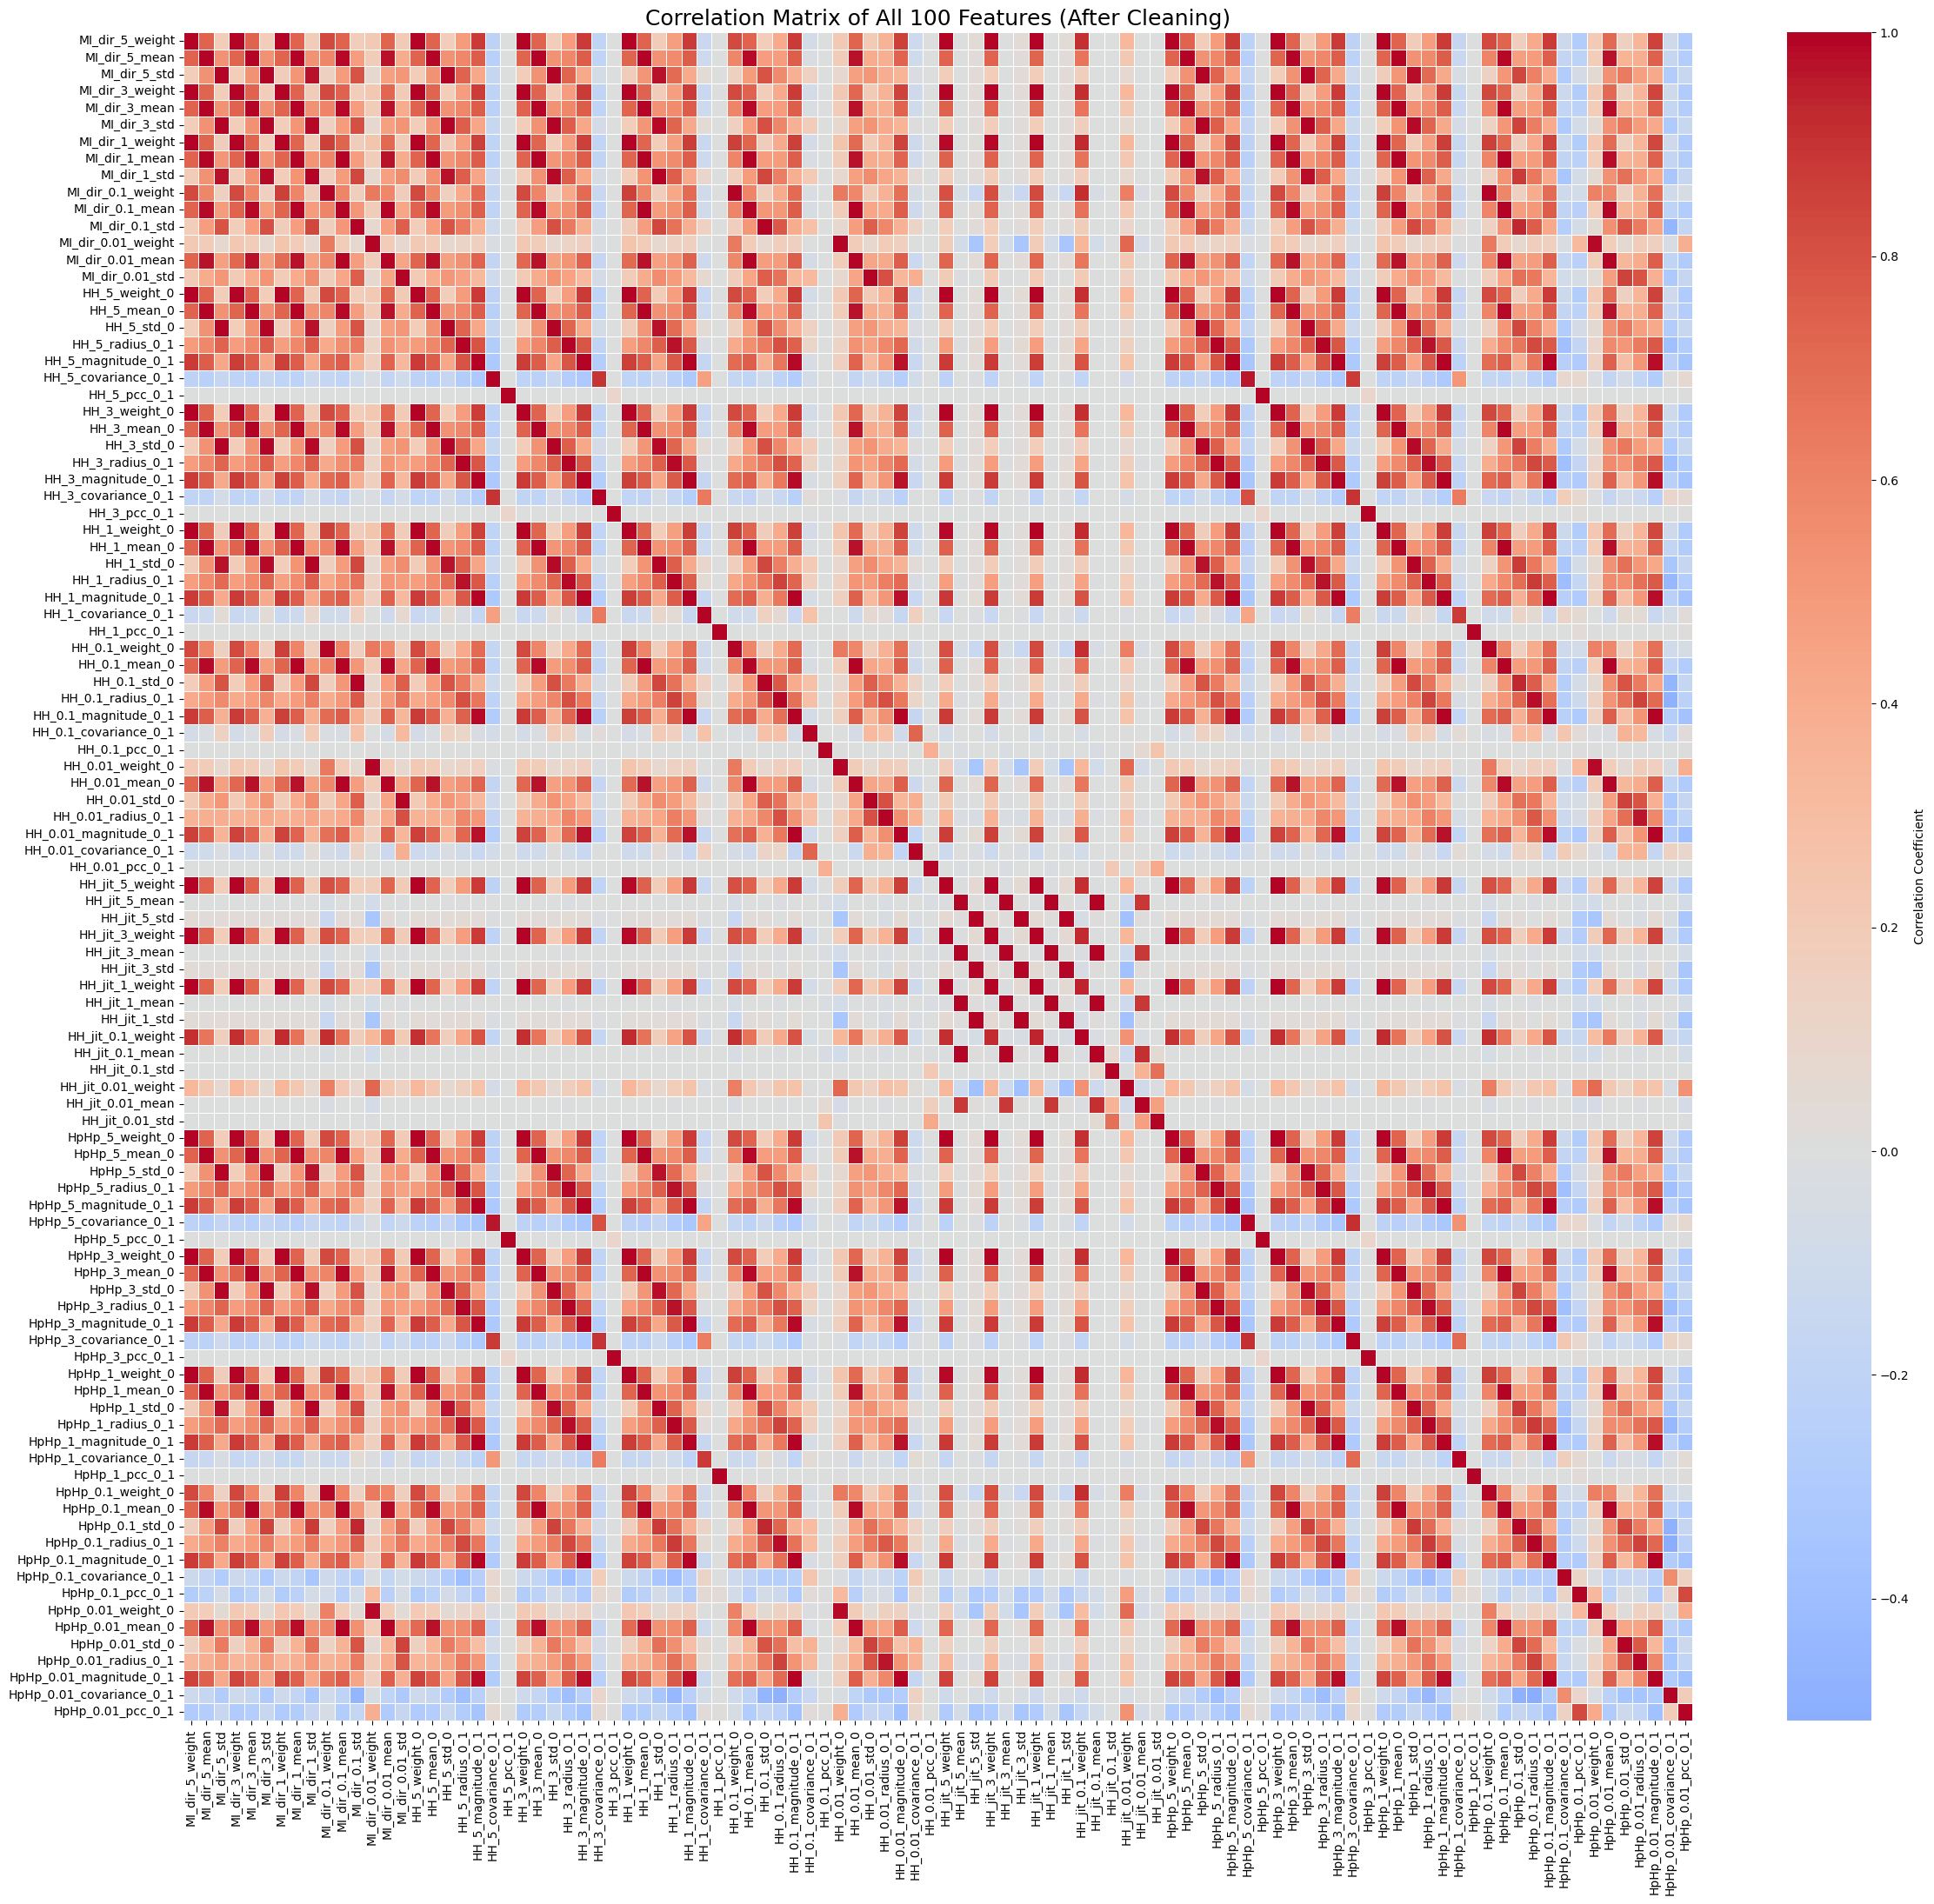

In [131]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'label' column and compute Pearson correlation
correlation_matrix = cleaned_df.drop(columns=['label']).corr()

# Plot the correlation matrix
plt.figure(figsize=(24, 22))  # Adjust size based on your screen/data
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of All 100 Features (After Cleaning)', fontsize=18)
plt.tight_layout()
plt.show()


In [132]:
corr_matrix = cleaned_df.drop(columns=["label"]).corr().abs()
upper_triangle = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
to_drop_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
cleaned_df = cleaned_df.drop(columns=to_drop_corr)

In [133]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = cleaned_df.drop(columns=["label"])  # All columns except label
y = cleaned_df['label']            

In [134]:
# Select top 30 features using ANOVA F-score (for classification)
selector = SelectKBest(score_func=mutual_info_classif, k=30)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_feature_names = X.columns[selector.get_support()].tolist()
print("Top 30 selected features:")
print(selected_feature_names)

Top 30 selected features:
['MI_dir_5_weight', 'MI_dir_5_mean', 'MI_dir_5_std', 'MI_dir_0.1_weight', 'MI_dir_0.1_std', 'MI_dir_0.01_weight', 'MI_dir_0.01_std', 'HH_5_radius_0_1', 'HH_5_magnitude_0_1', 'HH_5_pcc_0_1', 'HH_3_pcc_0_1', 'HH_1_covariance_0_1', 'HH_1_pcc_0_1', 'HH_0.1_radius_0_1', 'HH_0.1_covariance_0_1', 'HH_0.1_pcc_0_1', 'HH_0.01_radius_0_1', 'HH_0.01_covariance_0_1', 'HH_0.01_pcc_0_1', 'HH_jit_5_mean', 'HH_jit_5_std', 'HH_jit_0.1_std', 'HH_jit_0.01_weight', 'HH_jit_0.01_std', 'HpHp_1_covariance_0_1', 'HpHp_0.1_covariance_0_1', 'HpHp_0.1_pcc_0_1', 'HpHp_0.01_std_0', 'HpHp_0.01_covariance_0_1', 'HpHp_0.01_pcc_0_1']


In [95]:
final_df = pd.DataFrame(X_selected, columns=selected_features)
final_df["label"] = y.values
final_df

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_0.1_weight,MI_dir_0.1_std,MI_dir_0.01_weight,MI_dir_0.01_std,HH_5_radius_0_1,HH_5_magnitude_0_1,HH_5_pcc_0_1,...,HH_jit_0.1_std,HH_jit_0.01_weight,HH_jit_0.01_std,HpHp_1_covariance_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_std_0,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,label
0,1.000000,74.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,74.000000,0.000000e+00,...,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
1,1.000000,74.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,104.651804,0.000000e+00,...,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,1.995108,69.990192,1.599990e+01,1.999902,1.600000e+01,1.999990,1.600000e+01,3.999988e+00,101.855913,0.000000e+00,...,5.005663e-07,1.999990,5.005663e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,1
3,2.994257,77.674838,1.284248e+02,2.999885,1.282263e+02,2.999988,1.282226e+02,1.133247e+01,107.281780,0.000000e+00,...,4.096306e-07,2.999988,4.096270e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.282226e+02,0.000000e+00,0.000000e+00,1
4,1.994994,69.989964,1.599990e+01,1.999900,1.600000e+01,1.999990,1.600000e+01,1.201768e+01,104.556088,-3.004095e-01,...,5.241152e-07,1.999990,5.241152e-07,-1.362721e+01,-1.362939e+01,-3.009039e-01,1.600000e+01,-1.362961e+01,-3.009130e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214415,1.153054,68.000000,0.000000e+00,5.768387,1.818989e-12,19.448325,1.818989e-12,0.000000e+00,96.166522,0.000000e+00,...,1.853050e-07,2.935701,7.278315e-06,2.182747e-15,2.755166e-15,8.321167e-09,4.547474e-12,2.863405e-15,1.371971e-09,0
214416,1.975331,66.987512,9.998440e-01,2.031048,9.999999e-01,5.871283,1.000000e+00,9.999220e-01,95.453270,0.000000e+00,...,9.021676e+02,5.871283,9.022128e+02,-1.676150e-15,4.866936e-15,3.608615e-09,1.000000e+00,4.361229e-15,2.045143e-09,0
214417,1.000000,68.000000,0.000000e+00,1.031562,6.027112e-02,4.871510,9.578674e-01,0.000000e+00,96.166522,0.000000e+00,...,5.437416e+01,4.871510,8.642353e+02,-7.406582e-18,5.026033e-15,1.517943e-08,9.578674e-01,4.643847e-15,2.225052e-09,0
214418,2.084801,68.000000,9.094947e-13,6.761352,1.818989e-12,20.445951,1.818989e-12,9.536743e-07,96.166522,0.000000e+00,...,3.684227e-08,2.935663,8.060285e-06,-5.414422e-18,4.004383e-15,0.000000e+00,2.728484e-12,3.681541e-15,2.277279e-09,0


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df= cleaned_df
X_all = df.drop(columns=["label"])
y = df["label"]
# === Function: Drop Highly Correlated Columns ===
def drop_high_corr(X, threshold=0.9):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return X.drop(columns=to_drop)

# === Function: SelectKBest ===
def select_kbest(X, y, k=30):
    selector = SelectKBest(mutual_info_classif, k=k)
    X_kbest = selector.fit_transform(X, y)
    return pd.DataFrame(X_kbest, columns=X.columns[selector.get_support()])

# === Function: Evaluate Accuracy ===
def evaluate_model(X, y, name):
    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{name} Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# === 1. Correlation Only ===
X_corr = drop_high_corr(X_all)
evaluate_model(X_corr, y, "Correlation Only")

# === 2. SelectKBest Only ===
X_kbest = select_kbest(X_all, y, k=30)
evaluate_model(X_kbest, y, "SelectKBest Only")

# === 3. Correlation + SelectKBest ===
X_corr_first = drop_high_corr(X_all)
X_corr_kbest = select_kbest(X_corr_first, y, k=30)
evaluate_model(X_corr_kbest, y, "Correlation + SelectKBest")

Correlation Only Accuracy: 0.9864 ± 0.0175
SelectKBest Only Accuracy: 0.9872 ± 0.0171
Correlation + SelectKBest Accuracy: 0.9872 ± 0.0171


In [120]:
print("Before SelectKBest:", cleaned_df.shape)
print("After SelectKBest:", final_df.shape)

Before SelectKBest: (214420, 101)
After SelectKBest: (214420, 31)


In [144]:
cleaned_df.to_csv(r"C:\Users\USER\CyberMOPAI/cleaned_dataset.csv", index=False)
final_df.to_csv(r"C:\Users\USER\CyberMOPAI/top_30_features.csv", index=False)